#### Importing all modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### Read the data and check the first 5 rows

In [6]:
df= pd.read_csv("../otdr_data/otdr_dataset.csv")
df= df.iloc[:,1:]

# df.iloc[:,0:97]=df.iloc[:,0:97].abs()
df.head()

,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,...,z92,z93,z94,z95,z96,z97,start_point,end_point,isIntrusion,intrusion_zone
0,3.479755e-11,1.729669e-06,-1.074505e-06,1.696733e-06,1.408154e-06,-1.247660e-06,4.392523e-07,-1.822577e-07,-1.978193e-06,-4.215552e-08,...,4.510038e-07,4.933022e-08,-1.209462e-06,8.495825e-08,-1.360888e-07,-8.673617e-19,0.009132,40.904136,0.0,0.0
1,-5.774669e-10,-9.667019e-07,-1.172746e-06,-8.148441e-07,-1.085682e-06,-2.618001e-08,1.536875e-06,-4.809667e-07,7.355430e-08,1.620232e-06,...,-2.559091e-07,9.168085e-07,8.087109e-07,7.078943e-07,4.946341e-07,-6.505213e-19,41.005079,81.806418,0.0,0.0
2,7.974670e-10,5.440602e-07,5.968525e-07,-2.136242e-08,-2.463316e-07,4.842712e-07,-8.860241e-07,6.470653e-07,5.430934e-07,-1.458603e-06,...,-1.413626e-06,1.379344e-07,-3.167636e-07,-5.100911e-07,-4.025520e-07,1.301043e-18,81.912590,122.817894,0.0,0.0
3,-2.959882e-10,3.390513e-07,2.861875e-07,1.237342e-06,1.548561e-06,-4.017564e-07,-7.252355e-07,-5.407646e-07,-1.974723e-08,-8.548541e-07,...,2.269420e-06,3.904686e-07,-5.901801e-07,9.370105e-07,1.087443e-07,-3.373336e-09,122.893114,163.760757,0.0,0.0
4,1.426321e-10,-8.383938e-07,-8.720060e-08,-1.354042e-06,-1.309397e-06,9.558595e-07,9.235621e-07,1.726365e-06,1.359531e-07,-4.867452e-07,...,-2.116315e-06,-1.872924e-06,3.991558e-07,-2.448489e-07,2.474903e-07,3.373336e-09,163.940041,204.690356,0.0,0.0


In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense,LeakyReLU,Conv1D,Flatten,MaxPooling1D
from keras.optimizers import Adam

2025-02-06 13:35:01.268883: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
x=df.iloc[:, 0:97]
x.shape
x=np.asarray(x)
x = x.reshape(1000, 1,97)

In [9]:
model = Sequential()
# model.add(Conv1D(90, kernel_size=5, strides=10,input_shape=(None,97),kernel_initializer= 'uniform',))
model.add(Conv1D(90, kernel_size=1,input_shape=(1,97)))
model.add(LeakyReLU())
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(45, kernel_size=1))
model.add(LeakyReLU())
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(25, kernel_size=1))
model.add(LeakyReLU())
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(45, kernel_size=1))
model.add(LeakyReLU())
model.add(MaxPooling1D(pool_size=1))

model.add(Conv1D(90, kernel_size=1))
model.add(LeakyReLU())
model.add(Flatten())
model.add(Dense(97,activation="sigmoid"))

model.summary()

/Users/christopherozurumba/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1, 90)          │         8,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 1, 90)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 90)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1, 45)          │         4,095 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 1, 45)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 45)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 1, 25)          │         1,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 1, 25)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 1, 25)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 1, 45)          │         1,170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 1, 45)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 1, 45)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 1, 90)          │         4,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 1, 90)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 97)             │         8,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,202 (110.16 KB)

 Trainable params: 28,202 (110.16 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',loss='mae')  # mae --> mse

In [11]:
x.shape

(1000, 1, 97)

In [12]:
model.fit(x,x,batch_size=1,epochs=20)

Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0701
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - loss: 5.8479e-06
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 5.1766e-06
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4.8087e-06
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4.7802e-06
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4.8737e-06
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4.5320e-06
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4.8094e-06
Epoch 9/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4.8765e-06
Epoch 10/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4.8350e-06
Epoch 11/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 5.0182e-06
Epoch 12/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4.7545e-06
Epoch 13/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 5.0132e-06
Epoch 14/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


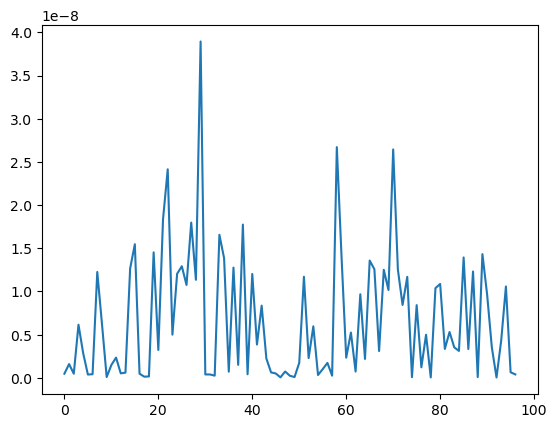

In [19]:
pred= model.predict(x)
plt.plot(pred[5])
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
(1000, 97)


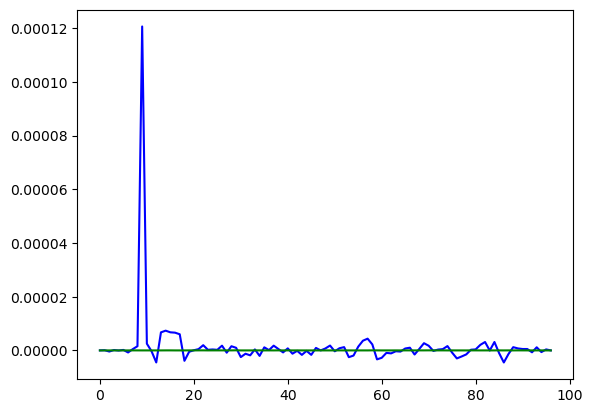

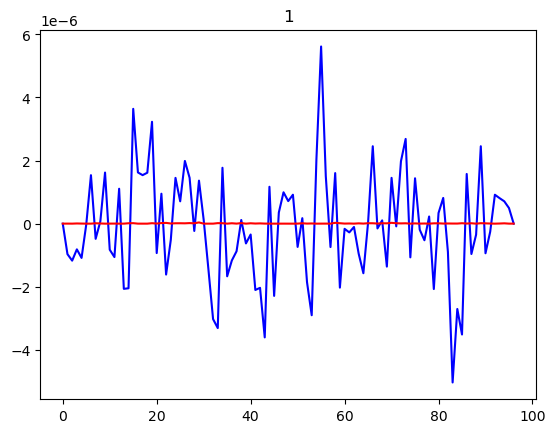

In [20]:
pred= model.predict(x)
print(pred.shape)

pred[1]
plt.plot(x[124][0],'b')
plt.plot(pred[124],"g")
plt.show()
a=1
for i in pred:
#     plt.plot(i)
    plt.title(f"{a}")
    a+=1
    plt.plot(x[a-1][0],'b')
    plt.plot(i,"r")
    plt.show()
    break

In [24]:
from keras.losses import mean_absolute_error as mae

# Then use it as:
los = mae(list1, list2)


NameError: name 'y' is not defined

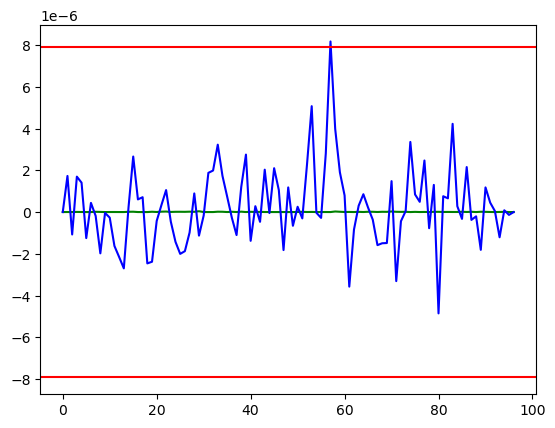

In [26]:
for index in range(len(pred)):
    list1= list(pred[index])
    list2=list(x[index][0])
    ans=[]

    los= keras.losses.mean_absolute_error(list1,list2) 
    for i in range(97):
        ans.append(abs(list1[i]-list2[i]))
    mean=np.mean(ans)
    std=np.std(ans)
#     print(los,mean,std)
    ans_point=-1
    for d in range(97):
        if list2[d]>mean+2*std:
            ans=d+1;
    plt.plot(list1,"g")
    plt.plot(list2,"b")

    plt.axhline(y=mean+5*std, color='r', linestyle='-')
    plt.axhline(y=-(mean+5*std), color='r', linestyle='-')
    plt.title(f"{index} zone {ans_point}   real ans {y[index]}")

            
    plt.show()
    break

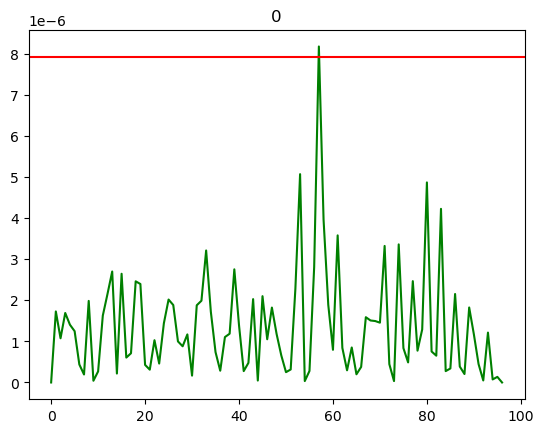

In [28]:
predicted_value=[]
for index in range(len(pred)):
    list1= list(pred[index])
    list2=list(x[index][0])
    los= keras.losses.mean_absolute_error(list1,list2) 
    ans=[]
    for i in range(97):
        ans.append(abs(list1[i]-list2[i]))
    mean=np.mean(ans)
    std=np.std(ans)
    temp=[]
    for d in range(97):
        temp.append(abs(list1[d]-list2[d]))
    plt.plot(temp,"g")
    predicted_value.append(temp)

    plt.axhline(y=mean+5*std, color='r', linestyle='-')
    plt.title(f"{index}")

            
    plt.show()
    break

In [35]:
print(len(predicted_value))

1


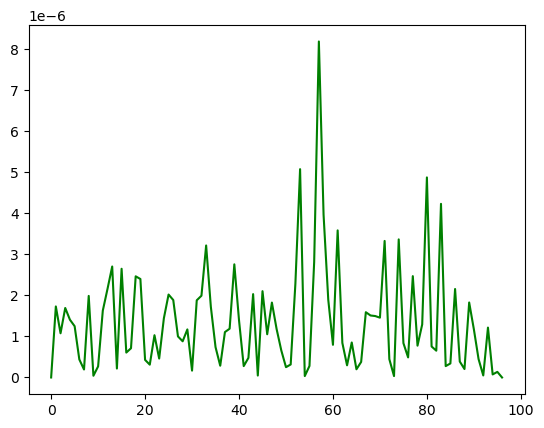

In [38]:
plt.plot(predicted_value[0],color="g")

In [40]:
ans=[0 for x in range(1)]
thresh= mean+5*std
for i in range(1):
    for j in range(97):
        if predicted_value[i][j]>thresh:
            if(ans[i]==0):
                ans[i]=j+1

In [42]:
correct=0
for i in range(0,1):
    if ans[i]==df.iloc[i,100]:
        correct+=1
    
print(correct,correct/2)   

0 0.0
